# Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics._classification import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier


# Loading Data

In [3]:
df = pd.read_csv("../data/train.csv.zip")
df_simpleFE = pd.read_csv("../data/df_fe_without_preprocessing_train.csv")
df_advanceFE = pd.read_csv("../data/df_advanced_fe.csv")

# we can train indiviual models on these 3 dfs and check how they are performing.
# I am going to work on final df that is combination of simple + advance features and which makes
# sense that is is going to perform better as compared to normal one

In [9]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [6]:
df_simpleFE.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [7]:
df_advanceFE.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

*   so we have question1 and question2 as text data which we need to convert into vectors in order for the models to understand

# Splitting the data into train-test

#### we will be using df_final which is combination of simple features + advance features


In [11]:
# reading the data
data = pd.read_csv("../data/final_df.csv")
print("Shape of data: ",data.shape)
data.sample(5)


Shape of data:  (404269, 32)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
303190,303208,107848,426314,are men generally physically stronger than women,if it is true that men are generally stronger ...,0,1,1,49,122,...,0.238094,0.0,0.0,14.0,14.0,87,52,38,58,0.280000
83369,83374,141162,141163,your application is under process at income ta...,income tax how to check pan card status,0,1,5,150,41,...,0.199999,0.0,0.0,17.0,16.5,80,40,38,68,0.404762
204300,204312,106616,257212,will we be able to make websites if we lose ne...,would there still be web hosting without net n...,1,3,2,59,56,...,0.249998,1.0,0.0,3.0,10.5,58,58,53,53,0.280702
36318,36322,66246,66247,are engineers overpaid,why are engineers so overpaid,0,1,1,23,30,...,0.599988,1.0,0.0,2.0,4.0,100,86,86,87,0.583333
152762,152771,75895,44135,why arnab goswami resigned times now,why did arnab goswami left et now,1,4,11,37,34,...,0.571420,1.0,1.0,1.0,6.5,78,61,72,68,0.428571


*   I have 404k data points.
*   We will perform 70:30 split

No of data points and features in Train:  (282988, 31)
No of data points and features in Test:  (121281, 31)
69.99992579198504 30.000074208014958


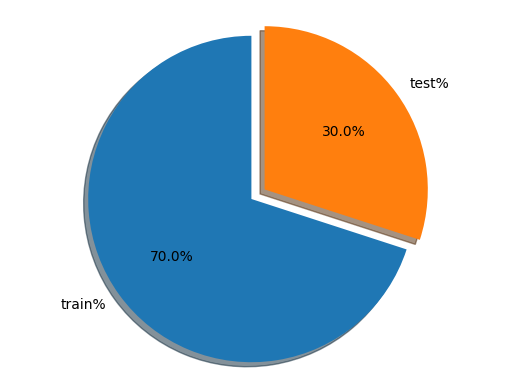

In [16]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


y = data["is_duplicate"]
x = data.drop(["is_duplicate"],axis=1)

X_train,X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,stratify =y)

print("No of data points and features in Train: ",X_train.shape)
print("No of data points and features in Test: ",X_test.shape)

total = Y_train.shape[0]+Y_test.shape[0]
total = Y_train.shape[0] + Y_test.shape[0]
trainP = (Y_train.shape[0]/total)*100
testP = (Y_test.shape[0]/total)*100

print(trainP,testP)
labels = ['train%','test%']
sizes = [70.0,30.0]
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels=labels, autopct = "%1.1f%%",shadow =True,startangle=90)
ax1.axis('equal')

plt.show()

# Featurization : Making Data Model Ready(Encoding Question1 and Question2)


## BAG-OF-WORDS

In [21]:
X_train_combined_text = X_train["question1"]+" " + X_train["question2"]
X_test_combined_text = X_test["question1"]+" " + X_test["question2"]

bow = CountVectorizer(max_features=2000)
X_train_bow = bow.fit_transform(X_train_combined_text)
X_test_bow = bow.transform(X_test_combined_text)



In [32]:
X_train_final_bow = X_train.drop(columns=["id","qid1","qid2","question1","question2"])
X_train_final_bow = np.hstack([X_train_final_bow,X_train_bow.toarray()])

#test set
X_test_final_bow = X_test.drop(columns=["id","qid1","qid2","question1","question2"])
X_test_final_bow = np.hstack([X_test_final_bow,X_test_bow.toarray()])
print(X_train_final_bow.shape)
print(X_test_final_bow.shape)

(282988, 2026)
(121281, 2026)


In [35]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_classifier.fit(X_train_final_bow, Y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_final_bow)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Log loss on Test Data using Random Model",log_loss(Y_test, y_pred, eps=1e-15))

Accuracy: 0.8455982388008014
Log loss on Test Data using Random Model 5.332894213796449


## TF-IDF

In [39]:
tfidf = TfidfVectorizer(max_features=2000)
X_train_tfidf = tfidf.fit_transform(X_train_combined_text)
X_test_tfidf = tfidf.transform(X_test_combined_text)

In [40]:
X_train_final_tfidf = X_train.drop(columns=["id","qid1","qid2","question1","question2"])
X_train_final_tfidf = np.hstack([X_train_final_tfidf,X_train_tfidf.toarray()])

#test set
X_test_final_tfidf = X_test.drop(columns=["id","qid1","qid2","question1","question2"])
X_test_final_tfidf = np.hstack([X_test_final_tfidf,X_test_tfidf.toarray()])
print(X_train_final_tfidf.shape)
print(X_test_final_tfidf.shape)

(282988, 2026)
(121281, 2026)


In [41]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_classifier.fit(X_train_final_tfidf, Y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_final_tfidf)
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Log loss on Test Data using Random Model",log_loss(Y_test, y_pred, eps=1e-15))

Accuracy: 0.8454415778234019
Log loss on Test Data using Random Model 5.338304716467517
